In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Image

In [380]:
data = pd.read_feather("../data/cab_data_14-15.feather")

In [546]:
df = data.sample(n=1000)

In [547]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10083015,2014-12-24 23:19:00.00000016,4.0,2014-12-24 23:19:00+00:00,-73.974952,40.755882,-73.986777,40.737950,2
11621652,2014-07-23 12:44:35.0000002,6.5,2014-07-23 12:44:35+00:00,-73.981383,40.780751,-73.981428,40.769604,1
9962525,2015-06-18 15:59:13.0000002,23.0,2015-06-18 15:59:13+00:00,-74.003899,40.742966,-73.984406,40.691326,1
7784547,2014-08-22 10:23:53.0000003,10.5,2014-08-22 10:23:53+00:00,-73.959506,40.781081,-73.984403,40.769668,1
9833331,2014-03-29 19:27:01.0000004,10.5,2014-03-29 19:27:01+00:00,-74.004223,40.742211,-73.989749,40.725765,1


In [548]:
df.shape

(1000, 8)

In [549]:
df.drop_duplicates(inplace=True)

In [550]:
df['id'] = df.key.str.split('.', expand=True)[1]
df.drop('key', axis=1, inplace=True)

In [551]:
pu_dt = pd.to_datetime(df.pickup_datetime)

In [552]:
df['day_of_week'] = pu_dt.dt.dayofweek
df['minute'] = pu_dt.dt.minute
df['hr_of_day'] = pu_dt.dt.hour
df['month'] = pu_dt.dt.month
df['year'] = pu_dt.dt.year
df['day'] = pu_dt.dt.day

del pu_dt
gc.collect()

6416

In [553]:
df.id = pd.to_numeric(df.id)

Text(0.5, 0, '# records having same pickup time')

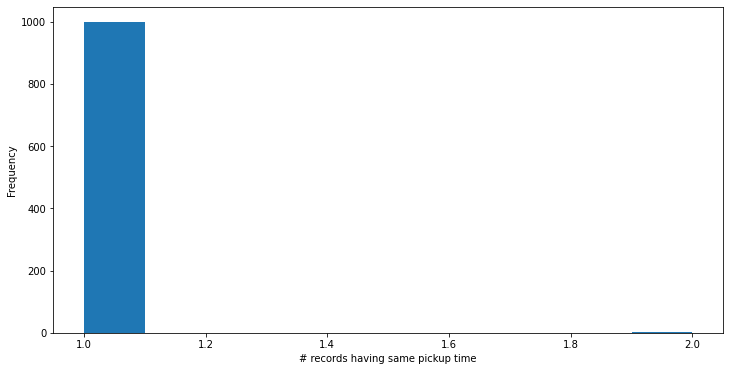

In [554]:
tmpdf = df.groupby(['day', 'month', 'year', 'hr_of_day', 'minute'])['id'].count().reset_index()
# (tmpdf.id > 1)
# fig = plt.figure(figsize=(12, 6))
# sns.distplot(tmpdf.set_index('pickup_datetime'))

fig, ax = plt.subplots()
tmpdf['id'].plot(kind='hist', figsize=(12,6), ax=ax)
ax.set_xlabel('# records having same pickup time')


In [555]:
def haversine_distance(df, lat1, long1, lat2, long2):
    R = 6371  #radius of earth in kilometers
    #R = 3959 #radius of earth in miles
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    #d = R*c
    d = (R * c) #in kilometers
    df['h_distance'] = d
    return d

In [556]:
haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

10083015    2.228934
11621652    1.239496
9962525     5.972453
7784547     2.450646
9833331     2.198062
              ...   
6245301     2.269466
9378063     1.788525
6999050     2.380868
8009191     1.434903
8268303     1.105323
Length: 1000, dtype: float64

In [557]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,id,day_of_week,minute,hr_of_day,month,year,day,h_distance
10083015,4.0,2014-12-24 23:19:00+00:00,-73.974952,40.755882,-73.986777,40.737950,2,16,2,19,23,12,2014,24,2.228934
11621652,6.5,2014-07-23 12:44:35+00:00,-73.981383,40.780751,-73.981428,40.769604,1,2,2,44,12,7,2014,23,1.239496
9962525,23.0,2015-06-18 15:59:13+00:00,-74.003899,40.742966,-73.984406,40.691326,1,2,3,59,15,6,2015,18,5.972453
7784547,10.5,2014-08-22 10:23:53+00:00,-73.959506,40.781081,-73.984403,40.769668,1,3,4,23,10,8,2014,22,2.450646
9833331,10.5,2014-03-29 19:27:01+00:00,-74.004223,40.742211,-73.989749,40.725765,1,4,5,27,19,3,2014,29,2.198062


In [558]:
df = df.reset_index(drop=True)
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,id,day_of_week,minute,hr_of_day,month,year,day,h_distance
0,4.0,2014-12-24 23:19:00+00:00,-73.974952,40.755882,-73.986777,40.737950,2,16,2,19,23,12,2014,24,2.228934
1,6.5,2014-07-23 12:44:35+00:00,-73.981383,40.780751,-73.981428,40.769604,1,2,2,44,12,7,2014,23,1.239496
2,23.0,2015-06-18 15:59:13+00:00,-74.003899,40.742966,-73.984406,40.691326,1,2,3,59,15,6,2015,18,5.972453
3,10.5,2014-08-22 10:23:53+00:00,-73.959506,40.781081,-73.984403,40.769668,1,3,4,23,10,8,2014,22,2.450646
4,10.5,2014-03-29 19:27:01+00:00,-74.004223,40.742211,-73.989749,40.725765,1,4,5,27,19,3,2014,29,2.198062


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        1000 non-null   float64            
 1   pickup_datetime    1000 non-null   datetime64[ns, UTC]
 2   pickup_longitude   1000 non-null   float64            
 3   pickup_latitude    1000 non-null   float64            
 4   dropoff_longitude  1000 non-null   float64            
 5   dropoff_latitude   1000 non-null   float64            
 6   passenger_count    1000 non-null   int64              
 7   id                 1000 non-null   int64              
 8   day_of_week        1000 non-null   int64              
 9   minute             1000 non-null   int64              
 10  hr_of_day          1000 non-null   int64              
 11  month              1000 non-null   int64              
 12  year               1000 non-null   int64         

In [560]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,id,day_of_week,minute,hr_of_day,month,year,day,h_distance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.760620,-72.421240,39.894760,-72.715198,40.057057,1.766000,38.579000,3.026000,28.862000,13.561000,5.549000,2014.299000,15.323000,37.949271
std,10.676804,10.612161,5.845967,9.567387,5.270499,1.461294,60.285488,1.993313,17.032647,6.459567,3.350048,0.458049,8.695993,547.005271
min,2.500000,-74.029099,0.000000,-74.177531,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,1.000000,0.000000
25%,6.500000,-73.991512,40.733351,-73.990783,40.732865,1.000000,2.000000,1.000000,14.000000,9.000000,3.000000,2014.000000,8.000000,1.226333
50%,9.500000,-73.981544,40.752202,-73.979662,40.752608,1.000000,5.000000,3.000000,28.000000,14.000000,5.000000,2014.000000,15.000000,2.096933
75%,14.500000,-73.964467,40.768851,-73.961031,40.768163,2.000000,55.250000,5.000000,43.000000,19.000000,8.000000,2015.000000,22.000000,3.895946
max,92.500000,0.000000,40.827067,0.000000,40.865883,6.000000,279.000000,6.000000,59.000000,23.000000,12.000000,2015.000000,31.000000,8666.091044


### Validation check on column values
#### fare_amount

<AxesSubplot:ylabel='Frequency'>

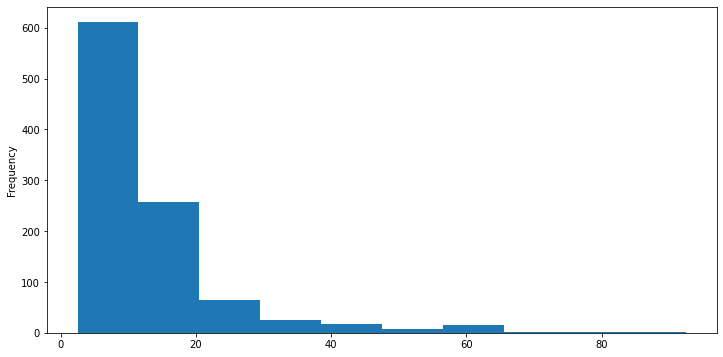

In [561]:
df.fare_amount.plot(kind='hist', figsize=(12,6))

In [562]:
# % of records having negative or zero fare amount.
mask = df.fare_amount <= 0
(mask).sum()*100/df.shape[0]

0.0

In [563]:
# dropping records with negative or zero fare amount, as only positive fare amount makes sense.
df.drop(df[mask].index, inplace=True)

#### passenger count

In [564]:
# passenger count should be > 0
# % of records with invalid passenger count.
(df.passenger_count <=0).sum()*100/df.shape[0]

0.1

In [565]:
mask = df.passenger_count <= 0
df.drop(df[mask].index, inplace=True)

#### pickup and dropoff lattitude and longitude
Valid range is -90 to 90 for latitude and -180 to 180 for longitude

In [566]:
mask1 = ((df.pickup_latitude < -90) | (df.pickup_latitude > 90)) 
mask2 = ((df.pickup_longitude < -180) | (df.pickup_longitude > 180))
mask3 = ((df.dropoff_latitude < -90) | (df.dropoff_latitude > 90))
mask4 = ((df.dropoff_longitude < -180) | (df.dropoff_longitude > 180))
mask5 = ((df.pickup_longitude == df.dropoff_longitude) & (df.pickup_latitude == df.dropoff_latitude))
mask6 = ((df.pickup_latitude == 0) | (df.pickup_longitude == 0) | (df.dropoff_latitude == 0) | (df.dropoff_longitude == 0))

# % of records having invalid geo-locations
mask = (mask1 | mask2 | mask3 | mask4 | mask5 | mask6)
print(mask.sum()*100/df.shape[0])
df.drop(df[mask].index, inplace=True)


2.7027027027027026


#### Max distance

In [567]:
# % of records breaching max possible distance
mask = (df.h_distance > 150) | (df.h_distance < 1)
print(mask.sum()*100/df.shape[0])
df.drop(df[mask].index, inplace=True)

15.432098765432098


### Data visualisation

(0.0, 200.0)

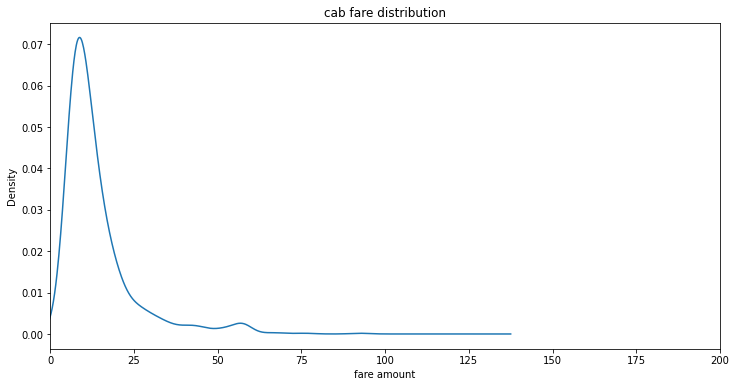

In [568]:
fig, ax = plt.subplots()
df.fare_amount.plot(kind='kde', figsize=(12,6), ax=ax)
ax.set_title('cab fare distribution')
ax.set_xlabel('fare amount')
ax.set_xlim(left=0, right=200)

<AxesSubplot:>

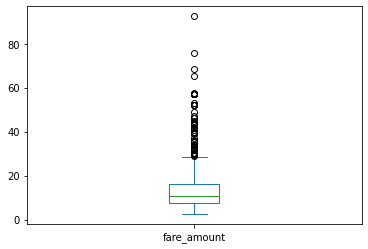

In [569]:
df.fare_amount.plot(kind='box')

In [570]:
(df.fare_amount > 50).sum()*100/df.shape[0]

2.9197080291970803

<AxesSubplot:ylabel='Frequency'>

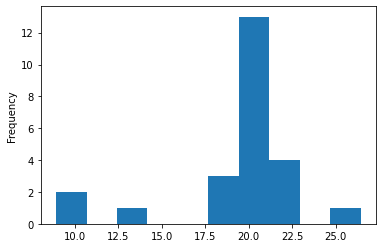

In [571]:
df[df.fare_amount > 50].h_distance.plot(kind='hist')

In [572]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'id',
       'day_of_week', 'minute', 'hr_of_day', 'month', 'year', 'day',
       'h_distance'],
      dtype='object')

In [573]:
# sns_plot = sns.pairplot(df[['fare_amount', 'passenger_count', 'day_of_week', 'hr_of_day', 'day', 'month', 'year', 'h_distance']], size=2.0)
# sns_plot.savefig("pairplot.png")

# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png')

In [574]:
df.shape

(822, 15)

Text(0.5, 1.0, 'day_of_week - volume vs mean_fare')

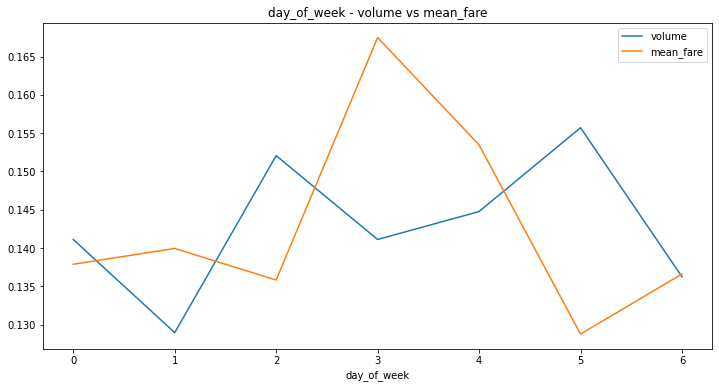

In [575]:
fig, ax = plt.subplots()
(df.groupby('day_of_week')['fare_amount'].count()/df.shape[0]).plot(kind='line', figsize=(12,6), ax=ax)
total_mean_fare = df.groupby('day_of_week')['fare_amount'].mean().sum()
(df.groupby('day_of_week')['fare_amount'].mean()/total_mean_fare).plot(kind='line', figsize=(12,6), ax=ax)
ax.legend(['volume', 'mean_fare'])
ax.set_title('day_of_week - volume vs mean_fare')

Text(0.5, 1.0, 'hr_of_day - volume vs mean_fare')

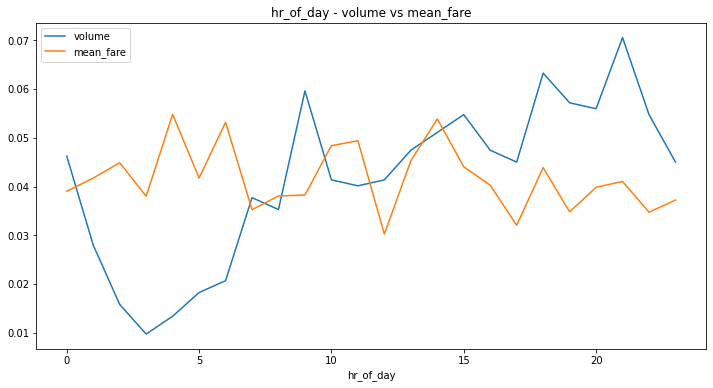

In [576]:
fig, ax = plt.subplots()
(df.groupby('hr_of_day')['fare_amount'].count()/df.shape[0]).plot(kind='line', figsize=(12,6))
total_mean_fare = df.groupby('hr_of_day')['fare_amount'].mean().sum()
(df.groupby('hr_of_day')['fare_amount'].mean()/total_mean_fare).plot(kind='line', ax=ax)
ax.legend(['volume', 'mean_fare'])
ax.set_title('hr_of_day - volume vs mean_fare')

Text(0.5, 1.0, 'month - volume vs mean_fare')

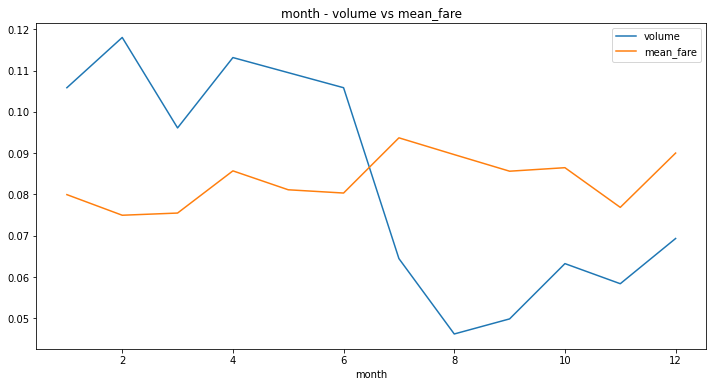

In [577]:
fig, ax = plt.subplots()
(df.groupby('month')['fare_amount'].count()/df.shape[0]).plot(kind='line', figsize=(12,6))
total_mean_fare = df.groupby('month')['fare_amount'].mean().sum()
(df.groupby('month')['fare_amount'].mean()/total_mean_fare).plot(kind='line', ax=ax)
ax.legend(['volume', 'mean_fare'])
ax.set_title('month - volume vs mean_fare')

Text(0.5, 1.0, 'day - volume vs mean_fare')

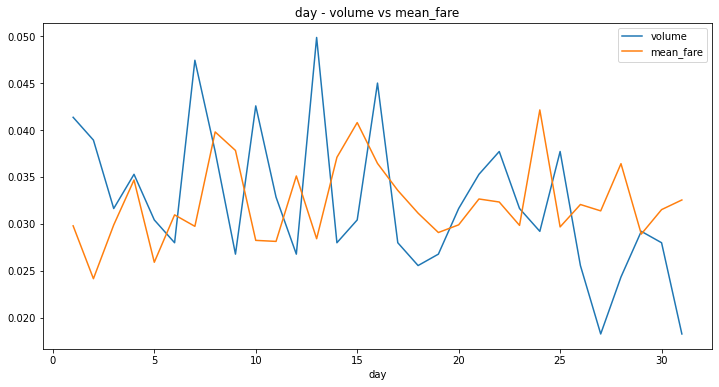

In [578]:
fig, ax = plt.subplots()
(df.groupby('day')['fare_amount'].count()/df.shape[0]).plot(kind='line', figsize=(12,6))
total_mean_fare = df.groupby('day')['fare_amount'].mean().sum()
(df.groupby('day')['fare_amount'].mean()/total_mean_fare).plot(kind='line', ax=ax)
ax.legend(['volume', 'mean_fare'])
ax.set_title('day - volume vs mean_fare')

Text(0, 0.5, 'fare_amount')

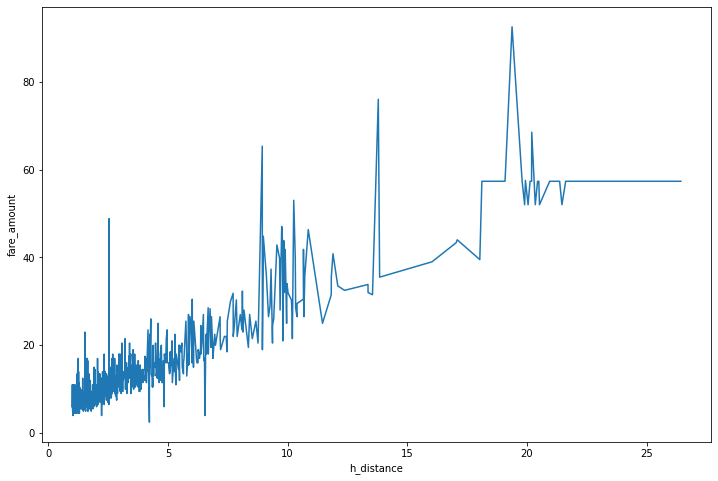

In [579]:
fig, ax = plt.subplots()
df.groupby(['h_distance'])['fare_amount'].mean().plot(kind='line', figsize=(12,8), ax=ax)
ax.set_ylabel('fare_amount')

fare_amount             AxesSubplot(0.125,0.125;0.0466867x0.755)
pickup_longitude     AxesSubplot(0.181024,0.125;0.0466867x0.755)
pickup_latitude      AxesSubplot(0.237048,0.125;0.0466867x0.755)
dropoff_longitude    AxesSubplot(0.293072,0.125;0.0466867x0.755)
dropoff_latitude     AxesSubplot(0.349096,0.125;0.0466867x0.755)
passenger_count       AxesSubplot(0.40512,0.125;0.0466867x0.755)
id                   AxesSubplot(0.461145,0.125;0.0466867x0.755)
day_of_week          AxesSubplot(0.517169,0.125;0.0466867x0.755)
minute               AxesSubplot(0.573193,0.125;0.0466867x0.755)
hr_of_day            AxesSubplot(0.629217,0.125;0.0466867x0.755)
month                AxesSubplot(0.685241,0.125;0.0466867x0.755)
year                 AxesSubplot(0.741265,0.125;0.0466867x0.755)
day                  AxesSubplot(0.797289,0.125;0.0466867x0.755)
h_distance           AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

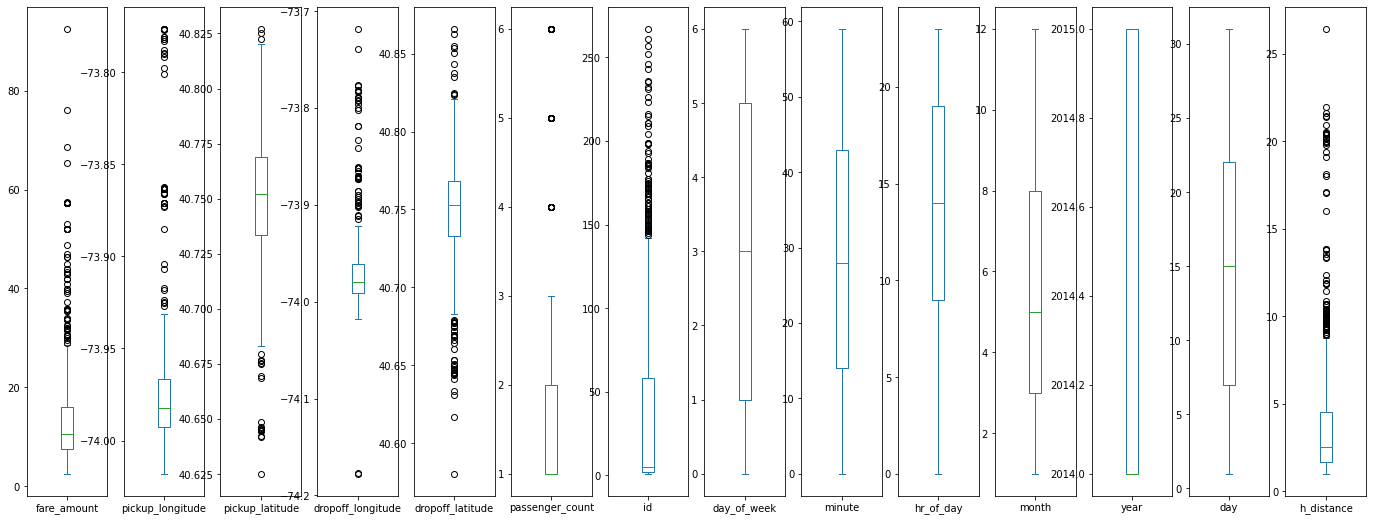

In [580]:
df.plot(kind='box', subplots=True, figsize=(24,9))

In [581]:
df[df.fare_amount > 150]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,id,day_of_week,minute,hr_of_day,month,year,day,h_distance


In [582]:
df[df.h_distance > 100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,id,day_of_week,minute,hr_of_day,month,year,day,h_distance


Text(0.5, 0, 'Distance')

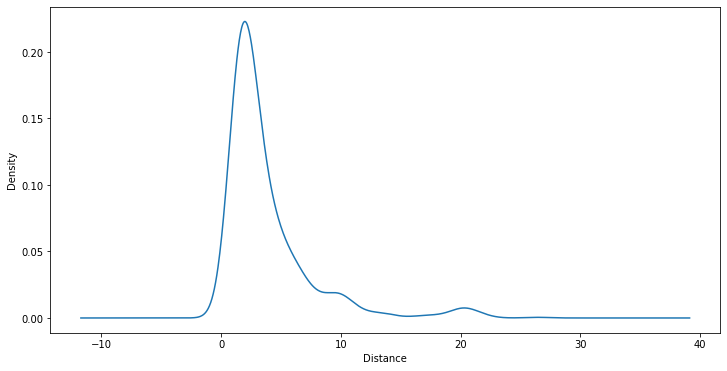

In [583]:
fig, ax = plt.subplots()
df.h_distance.plot(kind='kde', figsize=(12,6), ax=ax)
ax.set_xlabel("Distance")

### Feature selection

In [584]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'id',
       'day_of_week', 'minute', 'hr_of_day', 'month', 'year', 'day',
       'h_distance'],
      dtype='object')

In [585]:
train_cols = ['pickup_longitude', 'pickup_latitude', 
              'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 
              'day_of_week', 'hr_of_day', 'day','month', 'year', 'h_distance', 
              'fare_amount']
target = 'fare_amount'
feature_cols = [x for x in train_cols if x != target]

### Model Selection

In [586]:
train = df[train_cols]
X = train[feature_cols]
y = train[target]

In [587]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [615]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from hyperopt import STATUS_OK, hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

In [642]:
params = {
    'n_estimators': scope.int(hp.uniform('n_estimators', 10, 250)),
    'min_samples_leaf': scope.int(hp.uniform('min_samples_leaf', 1, 10)),
    'max_depth': scope.int(hp.uniform('max_depth', 5, 100)),
    'random_state': 1,
    'verbose': 0,
    'max_features': 'sqrt'
}

In [643]:
def train(x_train, y_train, params):
    rf_regressor = RandomForestRegressor(**params)
    rf_regressor.fit(x_train, y_train)
    return rf_regressor
    

In [644]:
import csv

def write_to_csv(out_file, row=None, header=False):
    
    if header:
        # File to save first results
        of_connection = open(out_file, 'w')
        writer = csv.writer(of_connection)
        # Write the headers to the file
        writer.writerow(['rmse', 'params', 'iteration', 'train_time'])
    else:
        assert(row is not None)
        # File to save first results
        of_connection = open(out_file, 'a')
        writer = csv.writer(of_connection)
        writer.writerow(row)
    of_connection.close()

In [645]:
import datetime
def create_row(rmse, params, out_file):
    cv_data = pd.read_csv(out_file)
    curr_iteration = cv_data.shape[0] + 1
    csv_row = [rmse, params, curr_iteration, datetime.datetime.now()]
    return csv_row

In [646]:
def optimisation(params, X, y, out_file):
    kfold = KFold(n_splits=3, shuffle=True)
    for idx in kfold.split(X, y):
        train_idx, test_idx = idx[0], idx[1]
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        rf_regressor = train(x_train, y_train, params)
        rmse = mean_squared_error(y_test, rf_regressor.predict(x_test), squared=False)
        write_to_csv(out_file , create_row(rmse, params, out_file))
        return { 'loss':rmse, 'status':STATUS_OK}
        

In [647]:
from functools import partial
import time

num_eval = 10
trials = Trials()
out_file='rf_trials' + str(time.time()) + '.csv'
optimisation_fn = partial(optimisation, X=X, y=y, out_file=out_file)
write_to_csv(out_file, header=True)
best_param = fmin(optimisation_fn, params, algo=tpe.suggest, 
                  max_evals=num_eval, trials=trials, rstate= np.random.default_rng(21))

100%|████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.08trial/s, best loss: 3.8470446106757152]


In [545]:
# rf_regressor = RandomForestRegressor(random_state=1, verbose=5, oob_score=True)
# rf_regressor.fit(X, y)

In [510]:
# rf_regressor.oob_score_

0.9027605504690167

In [511]:
# rf_regressor.feature_importances_

array([0.02393011, 0.01587243, 0.05716297, 0.02532169, 0.00259788,
       0.00525268, 0.01143942, 0.00728486, 0.00543184, 0.00111604,
       0.84459008])

In [512]:
# pd.DataFrame(rf_regressor.feature_importances_, rf_regressor.feature_names_in_).sort_values(by=0)

,0
year,0.001116
passenger_count,0.002598
day_of_week,0.005253
month,0.005432
day,0.007285
hr_of_day,0.011439
pickup_latitude,0.015872
pickup_longitude,0.023930
dropoff_latitude,0.025322
dropoff_longitude,0.057163


In [513]:
# y_pred = rf_regressor.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished


In [517]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

# print("mse:{}, mae:{}, max_error:{}".format(mean_squared_error(y_test, y_pred), 
#                                             mean_absolute_error(y_test, y_pred), max_error(y_test, y_pred)))

mse:1.5731315988614734, mae:0.6842805532854378, max_error:37.0967


In [518]:
# 68.4/df.fare_amount.mean()

4.808035668307071